In [1]:
%%html
<link rel="stylesheet" href="static/hyrule.css" type="text/css">

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
# pylab inline (either in the notebook or as an argument starting the notebook)
# will by default load numpy as np and matplotlib.pylab as plt
# Let's import everything else we used last time as well:

import pandas as pd
import seaborn as sns
import math
from __future__ import division
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.options.display.mpl_style = 'default'

/Users/Darin/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2885: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


# Data Exploration and Visualisation

## Objectives

* learn how to group and aggregate data in pandas
* learn how to visualise data with pandas
* explain the difference between cast and melt in terms of a data frame
* explore common visual relationships in data
* learn two visualisation packages in python independent of pandas

## Code Dictionary

### Additional Pandas Code

Function         | Description
-----------------|------------
`.groupby()`     | Creates a groupby object in pandas. pass in either a string (one column) or a list (multiple columns)
`.agg()`         | Aggregates data into a new DataFrame from a groupby object
`.pivot_table()` | generates a pivot table, akin to those you'd expect in excel.
`melt()`      | melts a DataFrame
`.plot()`        | general plot using matplotlib of the columns provided, using the index as the x-axis
`.hist()`        | generates a histogram using matplotlib of the columns provided, using the index as the x-axis
`.boxplot()`     | generates a boxplot, which displays distribution via quartiles and outliers
`pd.tools.plotting.scatter_matrix()` | a representation of histograms and scatterplots between columns <br /> Very common to import seperately using from pd.tools.plotting import scatter_matrix

<br />
### Matplotlib Basics

Run this first to generate some data! They'll relate to the matplotlib basics below.

```py
X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C, S = np.cos(X), np.sin(X)
```

Matplotlib functions will start with `plt`. In science we work with the concept of a `figure`, which is the space in which plots exist. While the below code is for `plot`, others are common as well (such as `hist`)

Code | Description
-----|------------
`plt.figure(figsize=(8, 6), dpi=80)` | Sets a figure size of 8 by 6 inches, with a dpi of 80
`plt.subplot(1, 1, 1)` | Create a new subplot from a grid of 1x1
`plt.plot(X, C, color="blue", linewidth=1.0, linestyle="-")` | Plots cosine with a blue continuous line of width 1 (pixels)
`plt.plot(X, S, color="green", linewidth=1.0, linestyle="-")` | Plots sine with a green continuous line of width 1 (pixels)
`plt.xlim(-4.0, 4.0)` | Set x limits
`plt.xticks(np.linspace(-4, 4, 9, endpoint=True))` | set x ticks
`plt.ylim(-1.0, 1.0)` | Set y limits
`plt.yticks(np.linspace(-1, 1, 5, endpoint=True))` | Set y ticks
`plt.savefig("exercice_2.png", dpi=72)` | Save figure using 72 dots per inch
`plt.show()` | Show result on screen

### Seaborn Basics

We'll need to install seaborn first. You can do this with conda, a package installer for Anaconda. With this, conda might also update other packages. seaborn, once imported, takes over default matplotlib figures

```sh
cd ~/anaconda/bin
conda install seaborn
```

Code | Description
-----|------------
`.set_style()`  | changes the current seaborn style. pass in parameters using a dictionary to update settings.
`.axes_style()` | returns a dictionary of the current styles settings 
`.despine()`    | removes the top and right ticks on a chart

## Lecture Notes

### Exploring the Wine Data Set

wine data set: https://archive.ics.uci.edu/ml/machine-learning-databases/wine/

### Aggregating Data

Last class was heavily focused on manipulating and subsetting individual observations in a data set. Exploring the raw data can be benefited by exploring the data as a whole through grouping and aggregations. Data aggregations and segmentations allow us to better understand and evaluate the properties of our data, particularly when we have a target variable in mind.

In [4]:
#x = '''1) This is line 1 
#2) This is line 2 
#3) This is line 3  
#4) This is line 4 
#5) This is line 5    
#6) This is line 6 '''
#x = x.split('\n')               # Split the string into a list of strings, using '\n' as the separator
#x = [i.strip() for i in x][2:]  # Strip out empty whitespace at the beginning and end of each item, only include items 3 and on.
#x = [i.split(')')[1].strip().lower() for i in x]   # Split at ')' but only take index 1 of the split, then make all lowercase
#cols = ['class']
#cols.extend(x)                  # Add all items in list x to the end of list cols 
#print(cols)

In [10]:
columns = """-- The attributes are (dontated by Riccardo Leardi, 
    riclea@anchem.unige.it )
    1) Alcohol
    2) Malic acid
    3) Ash
    4) Alcalinity of ash  
    5) Magnesium
    6) Total phenols
    7) Flavanoids
    8) Nonflavanoid phenols
    9) Proanthocyanins
    10)Color intensity
    11)Hue
    12)OD280/OD315 of diluted wines
    13)Proline"""

# we can generate the columns list using some string and list functions.
columns = columns.split('\n')     # Returns a list of strings separated by '\n in this case
columns = [i.strip() for i in columns][2:] # Returns a copy of the string with leading and trailing whitespace removed
columns = [i.split(')')[1].strip().lower() for i in columns]
cols = ['class']
cols.extend(columns)
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
wine = pd.read_csv(url, header=None)
wine.columns = cols
#wine.head()
wine

,class,alcohol,malic acid,ash,alcalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,od280/od315 of diluted wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.640000,1.040,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.380000,1.050,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.680000,1.030,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.800000,0.860,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.320000,1.040,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.750000,1.050,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.250000,1.020,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.050000,1.060,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.200000,1.080,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.220000,1.010,3.55,1045


In [11]:
# Create a groupby object:
winegroups = wine.groupby('class')
#print (type(winegroups))

# groupby objects allow for some standard pandas calls:

#winegroups.describe()
winegroups.describe()

alcalinity of ash    alcohol        ash  color intensity  flavanoids        hue   magnesium  malic acid  nonflavanoid phenols  od280/od315 of diluted wines  proanthocyanins      proline  total phenols
class                                                                                                                                                                                                                
1     count          59.000000  59.000000  59.000000        59.000000   59.000000  59.000000   59.000000   59.000000             59.000000                     59.000000        59.000000    59.000000      59.000000
      mean           17.037288  13.744746   2.455593         5.528305    2.982373   1.062034  106.338983    2.010678              0.290000                      3.157797         1.899322  1115.711864       2.840169
      std             2.546322   0.462125   0.227166         1.238573    0.397494   0.116483   10.498949    0.688549              0.070049                      0.357077         0.412109   221.520767       0.338961
      min            11.200000  12.850000   2.040000         3.520000    2.190000   0.820000   89.000000    1.350000              0.170000                      2.510000         1.250000   680.000000       2.200000
      25%            16.000000  13.400000   2.295000         4.550000    2.680000   0.995000   98.000000    1.665000              0.255000                      2.870000         1.640000   987.500000       2.600000
      50%            16.800000  13.750000   2.440000         5.400000    2.980000   1.070000  104.000000    1.770000              0.290000                      3.170000         1.870000  1095.000000       2.800000
      75%            18.700000  14.100000   2.615000         6.225000    3.245000   1.130000  114.000000    1.935000              0.320000                      3.420000         2.090000  1280.000000       3.000000
      max            25.000000  14.830000   3.220000         8.900000    3.930000   1.280000  132.000000    4.040000              0.500000                      4.000000         2.960000  1680.000000       3.880000
2     count          71.000000  71.000000  71.000000        71.000000   71.000000  71.000000   71.000000   71.000000             71.000000                     71.000000        71.000000    71.000000      71.000000
      mean           20.238028  12.278732   2.244789         3.086620    2.080845   1.056282   94.549296    1.932676              0.363662                      2.785352         1.630282   519.507042       2.258873
      std             3.349770   0.537964   0.315467         0.924929    0.705701   0.202937   16.753497    1.015569              0.123961                      0.496573         0.602068   157.211220       0.545361
      min            10.600000  11.030000   1.360000         1.280000    0.570000   0.690000   70.000000    0.740000              0.130000                      1.590000         0.410000   278.000000       1.100000
      25%            18.000000  11.915000   2.000000         2.535000    1.605000   0.925000   85.500000    1.270000              0.270000                      2.440000         1.350000   406.500000       1.895000
      50%            20.000000  12.290000   2.240000         2.900000    2.030000   1.040000   88.000000    1.610000              0.370000                      2.830000         1.610000   495.000000       2.200000
      75%            22.000000  12.515000   2.420000         3.400000    2.475000   1.205000   99.500000    2.145000              0.430000                      3.160000         1.885000   625.000000       2.560000
      max            30.000000  13.860000   3.230000         6.000000    5.080000   1.710000  162.000000    5.800000              0.660000                      3.690000         3.580000   985.000000       3.520000
3     count          48.000000  48.000000  48.000000        48.000000   48.000000  48.000000   48.000000   48.000000             48.000000                     48

In [12]:
winegroups.sum()

,alcohol,malic acid,ash,alcalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,od280/od315 of diluted wines,proline
class,,,,,,,,,,,,,
1,810.94,118.63,144.88,1005.2,6274,167.57,175.96,17.11,112.06,326.170000,62.660,186.31,65827
2,871.79,137.22,159.38,1436.9,6713,160.38,147.74,25.82,115.75,219.150000,74.996,197.76,36885
3,631.38,160.02,116.98,1028.0,4767,80.58,37.51,21.48,55.37,355.019999,32.770,80.81,30235


In [13]:
# Groupby objects also:
## can work through selected columns

#print winegroups.alcohol.mean()
#print winegroups[['alcohol', 'ash']].median()
#print winegroups[['alcohol']].median()

## can work through aggregation dictionaries, which can reference the origin
## groupby functions, or construct new functions.

#print winegroups.agg({'alcohol': 'median'})
print(winegroups.agg({'alcohol': lambda alcohol: alcohol.nunique() / alcohol.count()}))


        alcohol
class          
1      0.830508
2      0.704225
3      0.937500


### Pivot Tables

Pivot tables are another aggregational tool provided in pandas. Use pivot tables when:

1. we want to easily compare results of variables across groups
2. we want to easily plot results along the index.


In [25]:
pivoted_wine = wine.pivot_table(values='ash',
                 columns='class',
                 index='alcohol',
                 aggfunc='count')
pivoted_wine

class,1,2,3
alcohol,,,
11.03,NaN,1.0,NaN
11.41,NaN,1.0,NaN
11.45,NaN,1.0,NaN
11.46,NaN,1.0,NaN
11.56,NaN,1.0,NaN
11.61,NaN,1.0,NaN
11.62,NaN,1.0,NaN
11.64,NaN,1.0,NaN
11.65,NaN,1.0,NaN


### Aggregation shapes

Sometimes we'll need to "melt" or "cast" our aggregation into a different shape, mostly in the context of plotting or applying aggregations as new fields in the original data set. Consider the use case of `melt()` here.


In [26]:
pivoted_wine_reset = pivoted_wine.reset_index()
#print pivoted_wine_reset.head()


print (pd.melt(pivoted_wine_reset,
              id_vars=['alcohol'],
              value_vars=[1, 2, 3],
              value_name='count').dropna().head(20))


    alcohol class  count
51    12.85     1    1.0
55    12.93     1    1.0
59    13.05     1    4.0
60    13.07     1    1.0
63    13.16     1    1.0
65    13.20     1    1.0
67    13.24     1    2.0
69    13.28     1    1.0
70    13.29     1    1.0
71    13.30     1    1.0
75    13.39     1    1.0
77    13.41     1    1.0
79    13.48     1    1.0
81    13.50     1    1.0
82    13.51     1    1.0
84    13.56     1    2.0
85    13.58     1    1.0
87    13.63     1    1.0
88    13.64     1    1.0
90    13.68     1    1.0


### Aggregation Practice

1. This time, create a group by object on a rounded 'alcohol' field. You might want to break this out into:
    * create a new column with the rounded alcohol content
    * groupby on the new column
2. Explore the statistics from `.describe()` in this new groupby object. Across the new groups, what is interesting? What isn't?
3. Use a pivot table to show the count of each target type per rounded alcohol level.
4. Finally, melt the pivot table so that the columns represent each grouping and a count of that group.
5. **take a step back** What would be the `groupby()` code to create the same data frame you created in question 4?

In [33]:
#1
rounded_alcohol = pd.Series.round(wine["alcohol"])
wine["rounded_alcohol"] = wine.alcohol.round()
alcohol_group = wine.groupby(rounded_alcohol)

#2
#alcohol_group.describe()

#3
pivoted_rounded_alcohol = wine.pivot_table(values='ash',
                 columns='class',
                 index='rounded_alcohol',
                 aggfunc='count')
print(pivoted_rounded_alcohol)

#4 I don't think the code below is correct, but it's on the way
pivoted_rounded_reset = pivoted_rounded_alcohol.reset_index()

print(pd.melt(pivoted_rounded_reset,
            id_vars=['rounded_alcohol'],
            value_vars=[1, 2, 3],
            value_name='count'))

#5

class               1     2     3
rounded_alcohol                  
11.0              NaN   4.0   NaN
12.0              NaN  48.0   5.0
13.0             17.0  17.0  30.0
14.0             40.0   2.0  13.0
15.0              2.0   NaN   NaN
    rounded_alcohol class  count
0              11.0     1    NaN
1              12.0     1    NaN
2              13.0     1   17.0
3              14.0     1   40.0
4              15.0     1    2.0
5              11.0     2    4.0
6              12.0     2   48.0
7              13.0     2   17.0
8              14.0     2    2.0
9              15.0     2    NaN
10             11.0     3    NaN
11             12.0     3    5.0
12             13.0     3   30.0
13             14.0     3   13.0
14             15.0     3    NaN


#### Baseball Stats

We'll pull in the Lahman batting stats for data visualisation. There's only one table in the Lahman database for now; we'll add more as class moves forward. As mentioned before, pandas can read in from databases as well, using a db engine /connection.

Below includes the columns and their meanings:
```
player         Player ID code
year           Year
stint          player's stint (order of appearances within a season)
team           Team
lgID           League
G              Games
AB             At Bats
R              Runs
H              Hits
X2B            Doubles
X3B            Triples
HR             Homeruns
RBI            Runs Batted In
SB             Stolen Bases
CS             Caught Stealing
BB             Base on Balls
SO             Strikeouts
IBB            Intentional walks
HBP            Hit by pitch
SH             Sacrifice hits
SF             Sacrifice flies
GIDP           Grounded into double plays
```

In [34]:
import sqlite3
con = sqlite3.connect("../data/lahman.sqlite")
df = pd.read_sql("SELECT * from batting", con)
df = df.convert_objects(convert_numeric=True)

# Reminder: Many functions from data frames will work on groupby objects!
# What is below doing?
df.groupby('year').head(1)

/Users/Darin/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


,player,year,stint,team,lg,g,ab,r,h,X2b,X3b,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
0,abercda01,1871,1,TRO,NA,1,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
115,allenha01,1872,1,MID,NA,16,66.0,8.0,18.0,1.0,0.0,0.0,7.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN
271,addybo01,1873,1,PH2,NA,10,51.0,12.0,16.0,1.0,0.0,0.0,10.0,0.0,1.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN
396,addybo01,1874,1,HR1,NA,50,213.0,25.0,51.0,9.0,2.0,0.0,23.0,4.0,2.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN
519,abadijo01,1875,1,PH3,NA,11,45.0,3.0,10.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN
737,addybo01,1876,1,CHN,NL,32,142.0,36.0,40.0,4.0,1.0,0.0,16.0,NaN,NaN,5.0,0.0,NaN,NaN,NaN,NaN,NaN
861,addybo01,1877,1,CN1,NL,57,245.0,27.0,68.0,2.0,3.0,0.0,31.0,NaN,NaN,6.0,5.0,NaN,NaN,NaN,NaN,NaN
958,allisdo01,1878,1,PRO,NL,19,76.0,9.0,22.0,2.0,0.0,0.0,7.0,NaN,NaN,1.0,8.0,NaN,NaN,NaN,NaN,NaN
1038,adamsge01,1879,1,SR1,NL,4,13.0,0.0,3.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
1165,ahearch01,1880,1,TRN,NL,1,4.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN


### Single Variable Plots: Histograms and Boxplots

To best understand a feature on its own, we explore it using histograms. Histograms help us understand the distribution of data.

#### What shouild we be looking for?

1. Width of the data. Use this alongside standard deviation to understand scope.
2. Distributions. NYU has a [nice guideline](http://pages.stern.nyu.edu/~adamodar/New_Home_Page/StatFile/statdistns.htm) to consider. We'll go over distributions as they arise. But in particular:
3. Expected vs Actual: Is this the shape we expected? Does it make sense given the feature? 
4. Segments: What jumps out as interesting? For example, are we interested in observing an 80/20 problem, or interested in the majority?

#### Ways we generate histograms:

1. `df.col.hist()` : pandas integrates with matplotlib to build histograms on the fly. Pass in multiple columns to generate multiple histograms at the same time.
2. `plt.hist()`: direct matplotlib code.

#### Ways we generate boxplots:

1. `df.col.boxplot()` : pandas integration for boxplots. Pass in multiple columns to generate multiple boxplots at the same time.
2. `plt.boxplot()`: direct matplotlib code.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x119d913c8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x119f780b8>]], dtype=object)

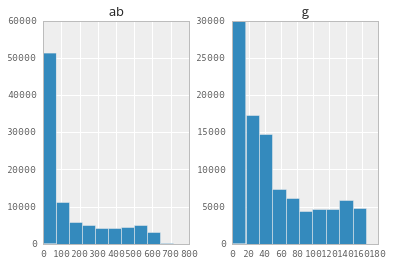

In [35]:
## Histograms
# pandas style
df[['g', 'ab']].hist()

# matplotlib style
#sns.set_style('white') # sets seaborn "white" to the default matplotlib style
#plt.figure(figsize=(8, 6), dpi=80)
#plt.subplot(1, 1, 1)
#plt.hist(df.g, bins=20)

## Boxplots
# pandas style
#plt.figure(figsize=(8, 6), dpi=80)
#df[['g', 'ab']].boxplot()

# matplotlib style
#plt.figure(figsize=(8, 6), dpi=80)
#plt.subplot(1, 1, 1)
#plt.boxplot(df.g)

### Doing histograms faster

1. How do we use a for loop to generate a plot of each numeric field? Consider checking the fields `dtype` before making the plots
2. Wrap your histogram three-liner as a function. We should be in the habit of always generating figures and subplots, but it's less necessary to have to write all code each time you want to do so.

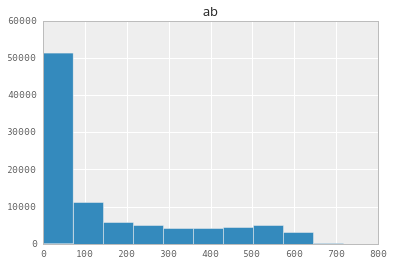

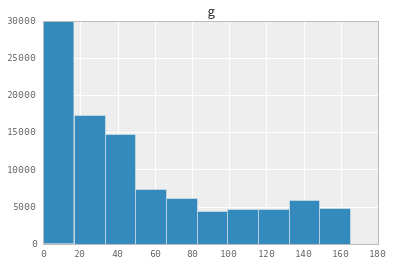

In [36]:
def gen_hist(frame, cols):
    for i in range(len(cols)):
        frame[[cols[i]]].hist()
        
gen_hist(df, ["ab", "g"])

### Multivariable plots: Scatterplots

While histograms allow us to explore fields individually, scatter plots allow us to compare and correlate data points. 

#### What to look for

1. Degrees of correlation (+/-). Are the two features positively or negatively correlated? What's the impact of one on the other?
2. Type of relationship. Is the relationship linear? Polynomial? Logarithmic? 

#### Ways we generate scatter plots:

1. `df.plot(type='scatter')` : pandas integrates with matplotlib to build scatter plots on the fly.
2. `plt.plot()`: direct matplotlib code. You'll have to specify the marker.
2. `plt.scatter()`: simpler context for matplotlib

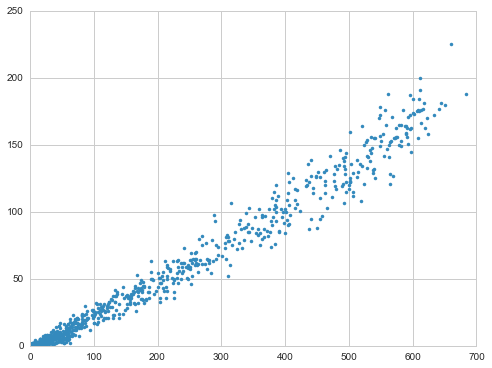

In [39]:
last_year = df[df.year == 2014]
sns.set_style('whitegrid')

# using plot and the '.' notation.
plt.figure(figsize=(8, 6), dpi=80)
plt.subplot(1, 1, 1)
plt.plot(last_year.ab, last_year.h, '.')

# using scatter, and setting additional parameters.
#plt.figure(figsize=(8, 6), dpi=80)
#plt.subplot(1, 1, 1)
#plt.scatter(last_year.ab, last_year.h, s=last_year.hr**2, alpha=0.3, c='g')

### Other useful pandas plots

#### Trellis Plotting

Trellis plotting is a technique to group histograms or scatterplots based on a segmentation. This will be familiar to R users (the `lattice` package adds this functionality, as well as ggplot's `facet_grid`). Trellis plotting helps us easily identify how a feature can change dependent on another. Trellis plotting is built into pandas.

/Users/Darin/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The rplot trellis plotting interface is deprecated and will be removed in a future version. We refer to external packages like seaborn for similar but more refined functionality. 

See our docs http://pandas.pydata.org/pandas-docs/stable/visualization.html#rplot for some example how to convert your existing code to these packages.
  if __name__ == '__main__':


Figure(480x320)


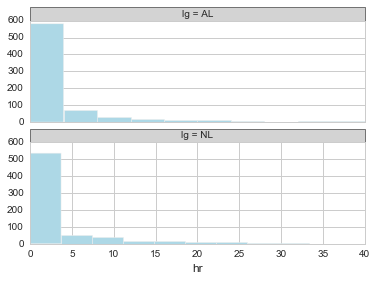

In [41]:
import pandas.tools.rplot as rplot
    
plt.figure()
plot = rplot.RPlot(last_year, x='hr')
plot.add(rplot.TrellisGrid(['lg','.']))
plot.add(rplot.GeomHistogram())
print(plot.render(plt.gcf()))

A similar output can be done using the "by" argument in the plotting syntax (This would be more akin to `facet_wrap` in ggplot)

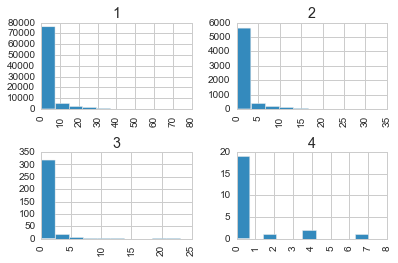

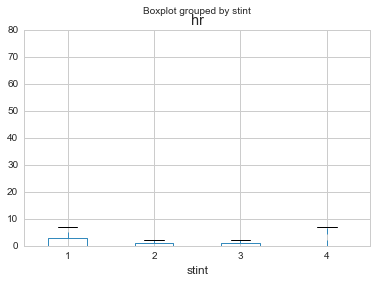

In [42]:
plt.figure()
df[df.stint < 5].hist('hr', by='stint')

plt.figure()
df[df.stint < 5].boxplot('hr', by='stint')

#### Scatter Matrix

While doing this through each variable could be conveniently handled in a for loop or using a trellis plot, pandas includes a scatter_matrix which will provide both a histogram of each numeric field, but also a scatter plot for each field comparison. Use this wisely, as it's rather heavy plotting, and therefore, dependent on your data, memory intensive. You can, of course, subset to columns you are interested in comparing.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c0b2080>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11b0dd5f8>]], dtype=object)

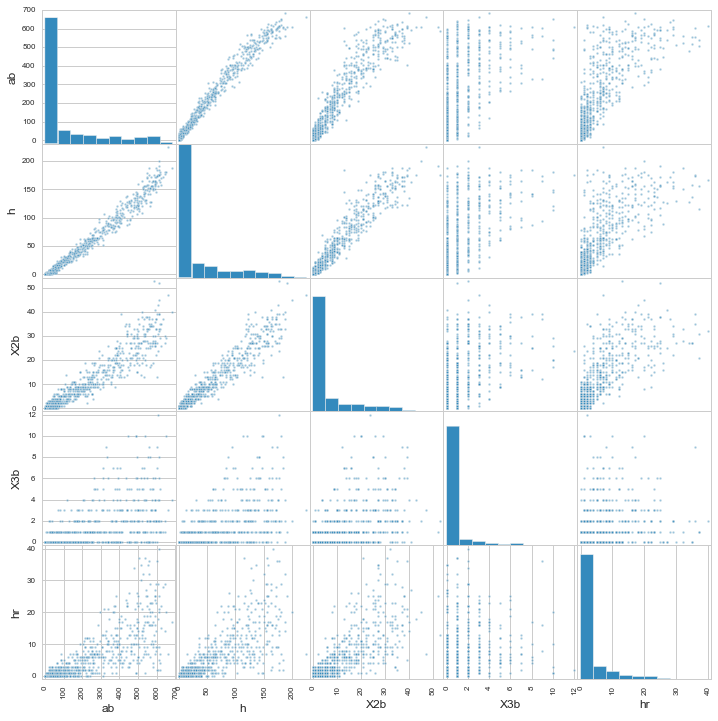

In [43]:
cols = ['ab', 'h', 'X2b', 'X3b', 'hr',]
pd.scatter_matrix(last_year[cols], figsize=(12, 12))

### Groupbys and grouped plotting

One final technique to consider (for today) is how we can use groupby and plotting alongside each other.

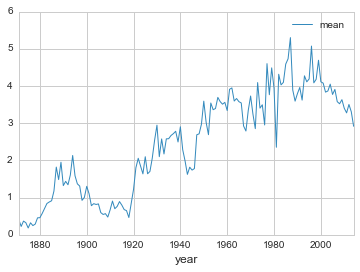

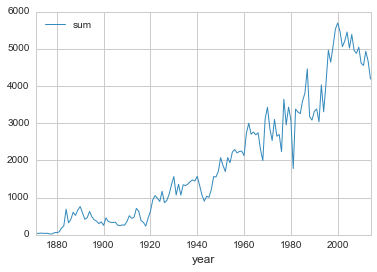

In [44]:
years_grouped = df.groupby('year')

plt.figure()
years_grouped.hr.agg(['mean']).plot()

plt.figure()
years_grouped.hr.agg(['sum']).plot()

## On Your Own

A very famous data set called Fisher's Iris data is included in sklearn. Import it with the following code into pandas (otherwise, it's a numpy ndarray)

```python
from sklearn import datasets
iris = datasets.load_iris()
iris_description = iris.DESCR
irisdf = pd.DataFrame(iris.data, columns=iris.feature_names)
irisdf['target'] = iris.target
print iris_description
```

1. describe, aggregate, and visualise the iris data set. what's interesting about it?
    * be able to show both scatterplots and histograms using matplotlib, Trellis, and the scatter_matrix. Use the class target to group by.
2. Which flowers are similar? Which seems to be in "its own world?"
3. Write an .apply() function that would "human learn" the three flowers. It would be your best attempt to:
    * split the flowers apart using the four columns
    * assign either a 1, 2 or 3, similar to target
    * test the performance of accuracy by measure how often your results match the original target vs the total count


## Review, Next Steps, Reading

#### Assignment 2: Due on Monday, Feb 9th
* You'll be practicing this week's lectures in more detail with citibike data. Use the following [link](https://github.com/podopie/DAT18NYC/blob/master/assignments/02-data_manipulation_and_visualization.md) to get to the details.

#### Additional Resources

* Watch Andrew Montalenti's ["Rapid Data Visualization"](http://vimeo.com/79580138)
   * Includes Pandas; D3.js; NVD3.js; Vega / Vincent; and PhantomJS. 
* View Wickham's [Grammar of Graphics Slides](http://www.slideshare.net/hadley/grammar-of-graphics-past-present-future)
    * Or, read his [paper](http://vita.had.co.nz/papers/layered-grammar.html)
* [another matplotlib tutorial](http://jakevdp.github.io/mpl_tutorial/)
* [Principles of Analytic Graphics](https://github.com/DataScienceSpecialization/courses/blob/master/04_ExploratoryAnalysis/Principles/PrinciplesofAnalyticGraphics.pdf?raw=true)
* [Matplotlib Docs](http://matplotlib.org/users/pyplot_tutorial.html)
* [Pandas Docs](http://pandas.pydata.org/pandas-docs/stable/visualization.html)
* [Choosing a Good Chart](http://extremepresentation.typepad.com/.shared/image.html?/photos/uncategorized/choosing_a_good_chart.jpg)
* [Columbia's deck on visualisation](http://www2.research.att.com/~volinsky/DataMining/Columbia2011/Slides/Topic2-EDAViz.ppt)
* [More practice with matplotlib and customisation](http://nbviewer.ipython.org/github/fonnesbeck/Bios366/blob/master/notebooks/Section2_4-Matplotlib.ipynb)

#### Next Steps
* We'll be learning and using statsmodels next week as a tool for further exploring and explaining data relationships. Consider going through [the documentation](http://statsmodels.sourceforge.net/stable/index.html) in your spare time to learn more.